# Глава 9

## Задание 9.2.

Создать треугольный сигнал и напечатать его. Вычислить спектр треугольного сигнала, применить differentiate и напечатать результат. Преобразовать спектр обратно в сигнал и напечатать его. Определить есть ли различия в воздействии diff и differentiate на этот сигнал.

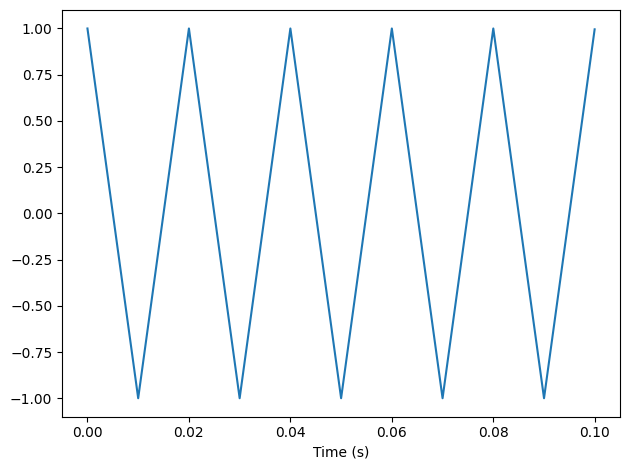

In [2]:
from thinkdsp import TriangleSignal, decorate

in_wave = TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

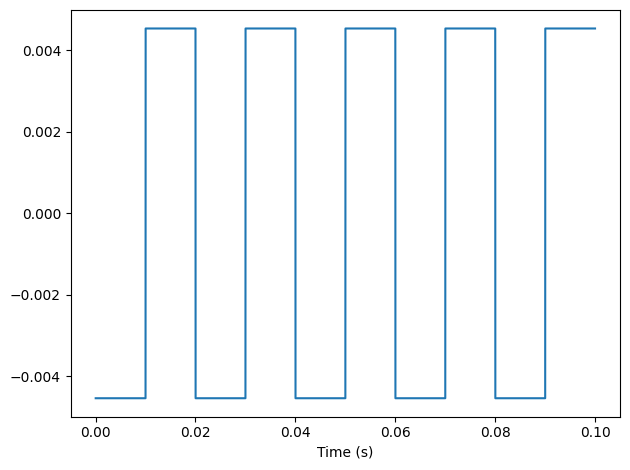

In [3]:
out_wave = in_wave.diff()
out_wave.plot()
decorate(xlabel='Time (s)')

Можно заметить, что после дифференцирования мы получили прямоугольный сигнал.

Теперь вычислим спектр, применим differentiate и посмотрим на результат.

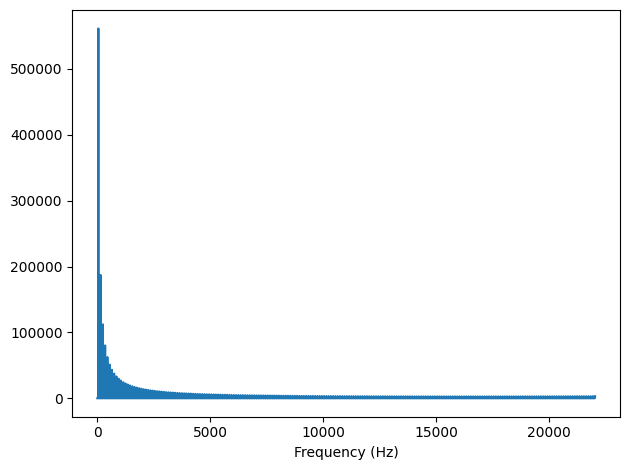

In [4]:
out_wave2 = in_wave.make_spectrum().differentiate()
out_wave2.plot()
decorate(xlabel='Frequency (Hz)')

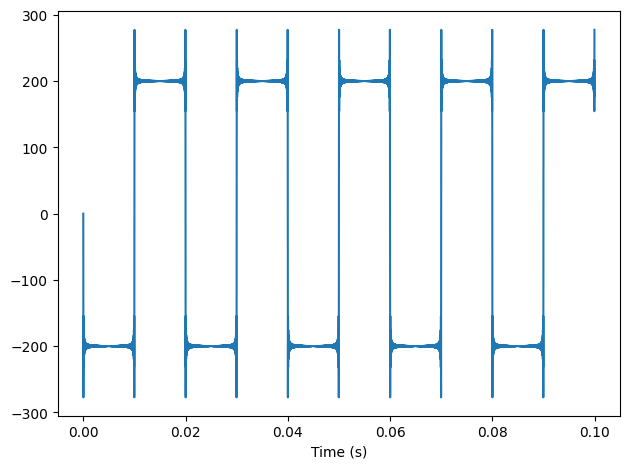

In [5]:
out_wave2 = out_wave2.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Различия между diff и differentiate будут минимальными, так как оба метода аппроксимируют производную, но differentiate работает в частотной области, а diff — во временной.
differentiate() даёт точную производную в частотной области, поэтому треугольный сигнал превращается в прямоугольный. Большая амплитуда (300) возникает из-за умножения спектра на 2*πi*f, что усиливает высокие частоты.


## Задание 9.3.

Создать прямоугольный сигнал и напечатать его. Применить cumsum и напечать результат. Вычислить спектр прямоугольного сигнала, применить integrate и напечатать результат. Преобразовать спектр обратно в сигнал и напечатать его. Определить есть ли различия в воздействии cumsum и integrate на этот сигнал.

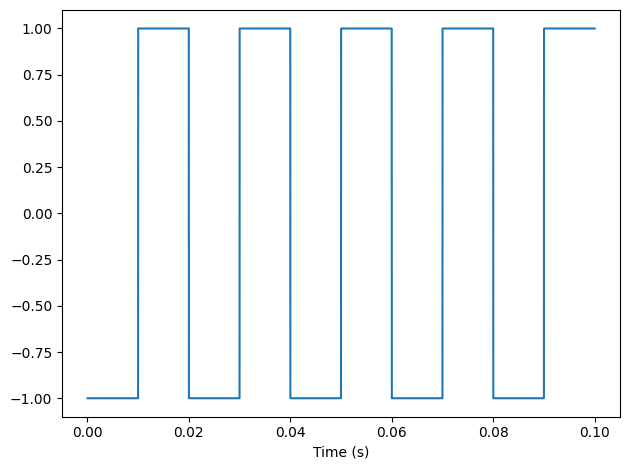

In [6]:
from thinkdsp import SquareSignal

in_wave = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

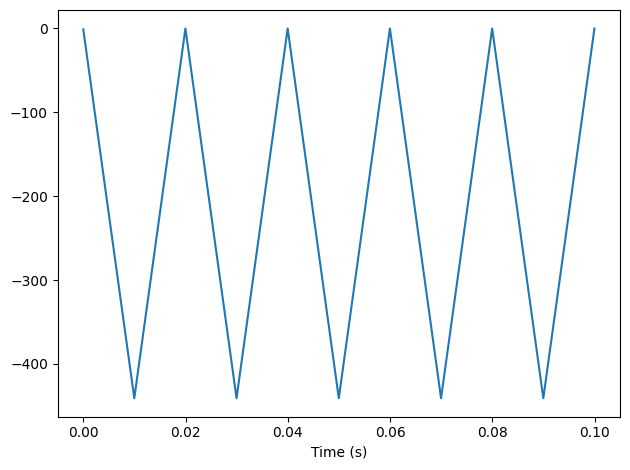

In [7]:
out_wave = in_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

Можно заметить, что совокупная сумма прямоугольной волны представляет собой треугольную волну.

Теперь вычислим спектр, применим integrate и посмотрим на результат.

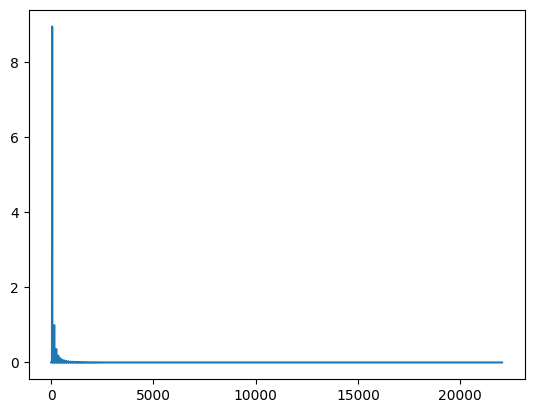

In [8]:
spectrum = in_wave.make_spectrum().integrate()
spectrum.hs[0] = 0
spectrum.plot()

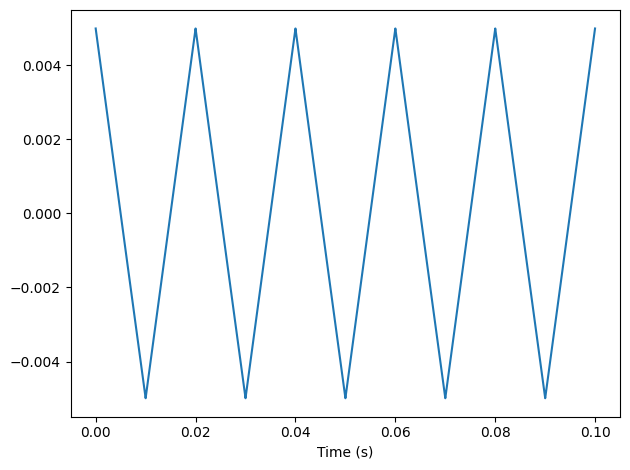

In [9]:
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Различия между cumsum и integrate будут только в аплитудах, так как оба метода выполняют интегрирование, но integrate работает в частотной области, а cumsum — во временной.
Однако если снять смещение и нормализовать, то две волны будут визуально одинаковыми.

## Задание 9.4.

Создать пилообразный сигнал, вычислить его спектр, а затем дважды применить integrate. Напечатать результирующий сигнал и его спектр. Определить математическую форму сигнала и почему она напоминает синусоиду.

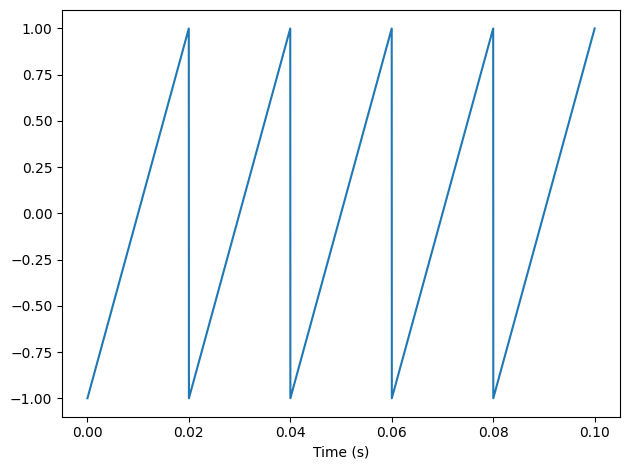

In [13]:
from thinkdsp import SawtoothSignal

in_wave = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

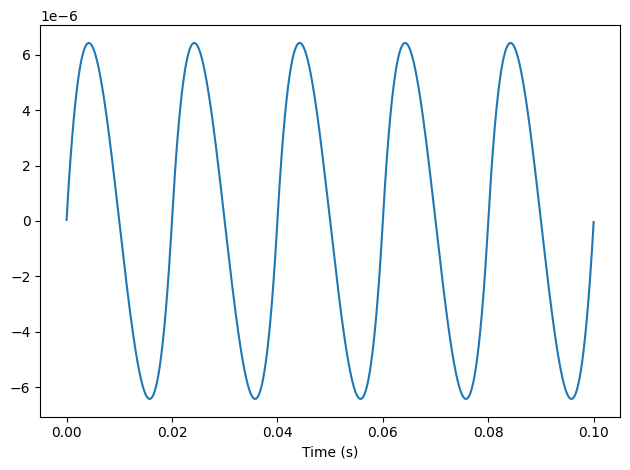

In [20]:
spectrum = in_wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

После двойного интегрирования пилообразный сигнал становится похожим на синусоиду, потому что интегрирование в частотной области ослабляет высокие гармоники. Каждое интегрирование делит спектр на частоту, поэтому после двух операций, амплитуды гармоник убывают как 1/n^3. В результате основная гармоника становится доминирующей, а вклад остальных частот пренебрежимо мал. Это приводит к форме, близкой к чистой синусоиде с небольшой остаточной погрешностью от высших гармоник. Это можно заметить и на спектре ниже.

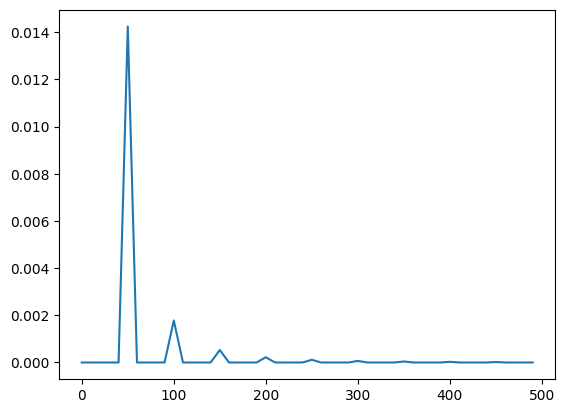

In [17]:
out_wave2.make_spectrum().plot(high=500)

## Задание 9.5.

Создать CubicSignal, вычислить вторую производную, дважды применив diff. Определить как выглядит результат. Вычислить вторую производную, дважды применив differentiate к спектру. Определить похожи ли результаты.

Распечатать фильтры, соответствующие второй разнице и второй производной, и сравнить их.

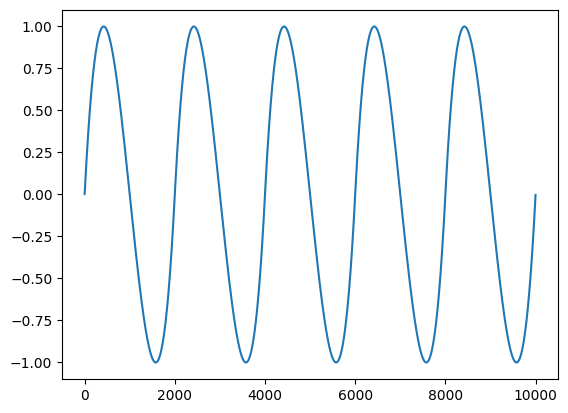

In [21]:
from thinkdsp import CubicSignal

in_wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

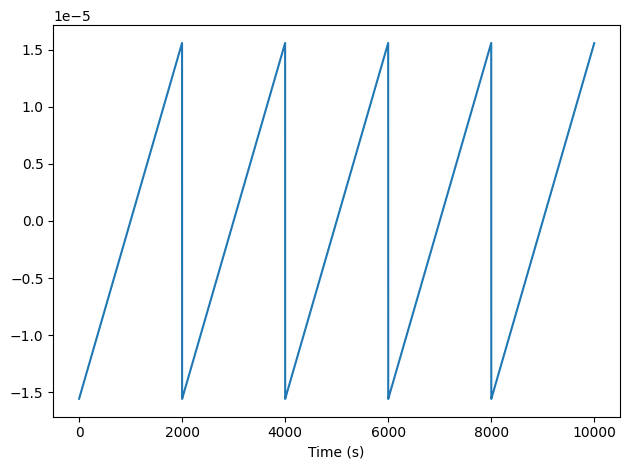

In [23]:
out_wave = in_wave.diff().diff()
out_wave.plot()
decorate(xlabel='Time (s)')

Можно заметить, что после вычисления второй производной с помощью diff, его форма напоминает пилообразный сигнал.

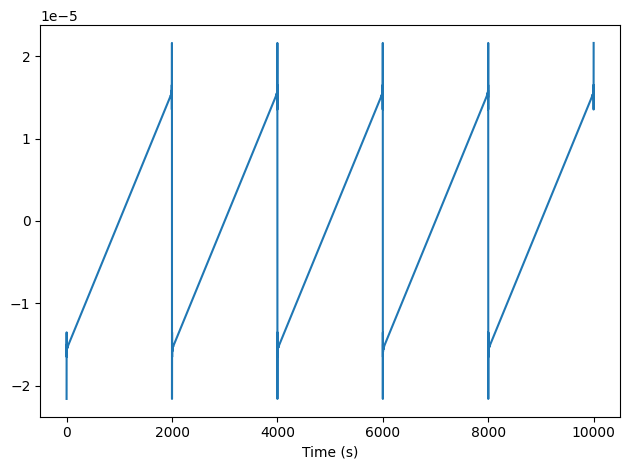

In [24]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Можно заметить, что что после вычисления второй производной с помощью differentiate,  его форма напоминает пилообразный сигнал с некоторым звоном. Это связано с тем, что производная параболического сигнала (первая производная) не определена в некоторых точках.

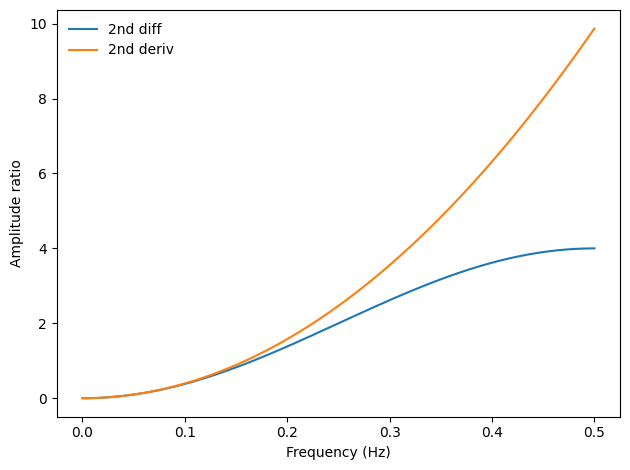

In [26]:
from thinkdsp import zero_pad
from thinkdsp import Wave
import numpy as np

diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()

deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (np.pi * 2 * 1j * deriv_filter.fs)**2

diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

Оба являются фильтрами верхних частот, которые усиливают высокочастотные составляющие. Вторая производная параболическая, поэтому она сильнее всего усиливает самые высокие частоты. 2-е отличие заключается в хорошей аппроксимации 2-й производной только на самых низких частотах, тогда она существенно отклоняется.